<a href="https://colab.research.google.com/github/Auful01/PCVK/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Gamma Correction pada citra
--------------------------------
Masukkan nilai Gamma : 3


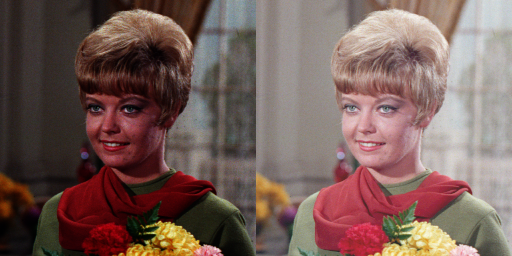

In [30]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np


print('Gamma Correction pada citra')
print('--------------------------------')

try: 
  gamma = int(input('Masukkan nilai Gamma : '))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
invGamma = 1/gamma

for i in range (gamma):
  hasil = np.array(255 * (original/255) ** invGamma, dtype='uint8')

final_frame = cv.hconcat((original,hasil))
cv2_imshow(final_frame)

image Depth Simulation pada citra
--------------------------------
Masukkan nilai Depth : 1


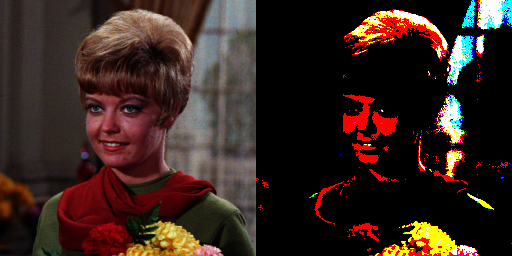

In [43]:
print('image Depth Simulation pada citra')
print('--------------------------------')

try: 
  depth = int(input('Masukkan nilai Depth : '))
except ValueError:
  print('error, not a number')

origin = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
level = 255/(2** depth - 1)

for i in range (depth):
  hasil = np.array(np.round((origin/level))*level, dtype='uint8')

final_depth = cv.hconcat((origin, hasil))
cv2_imshow(final_depth)

Jumlah Citra :  5
PSNR value :  24.131198464651863


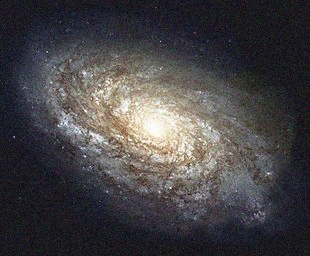

--------------------
Jumlah Citra :  30
PSNR value :  21.028939022374566


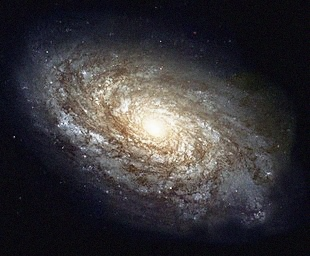

--------------------
Jumlah Citra :  60
PSNR value :  20.67647768040637


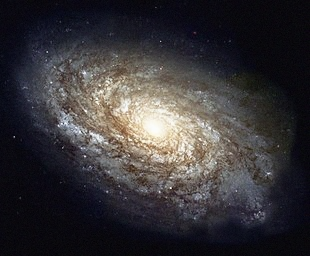

--------------------
Jumlah Citra :  80
PSNR value :  20.432334561852787


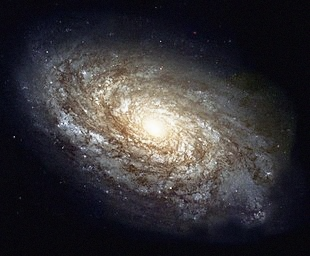

--------------------
Jumlah Citra :  100
PSNR value :  20.18151664466341


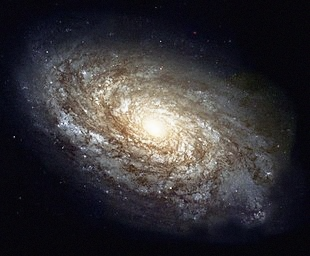

In [57]:
import glob
import math
location = glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg')
location.sort()

def number(n):
  temp = cv.imread(location[0])
  sum_arr = np.zeros(temp.shape)
  for picture in location[0:n]:
    img = cv.imread(picture)
    sum_arr = sum_arr + img
  denoised = sum_arr/ n
  output = cv.normalize(denoised, None, 0, 255, cv.NORM_MINMAX)
  print('Jumlah Citra : ', n)
  print('PSNR value : ',PSNR(temp, output))
  cv2_imshow(output)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2)**2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel/math.sqrt(mse))
  return psnr


number(5)
print('--------------------')
number(30)
print('--------------------')
number(60)
print('--------------------')
number(80)
print('--------------------')
number(100)

image input


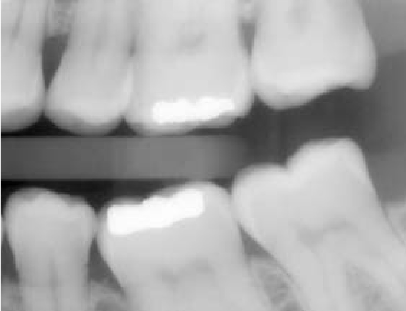

image output:


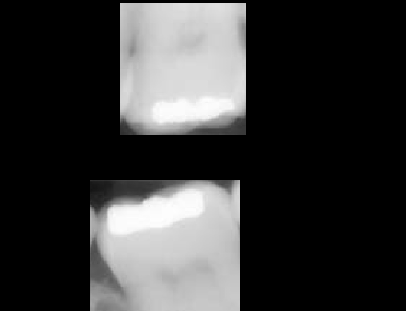

In [95]:
teeth = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')


mask = np.zeros(teeth.shape[:2], dtype='uint8')
mask = cv.rectangle(mask,(300,600), (800,1400), 255, -1)
mask = cv.rectangle(mask,(400,10), (820,450), 255, -1)
print('image input')
cv2_imshow(cv.resize(teeth, (0,0), fx=0.3, fy=0.3))
print('image output:')
masked = cv.bitwise_and(teeth, teeth, mask=mask)

cv2_imshow(cv.resize(masked, (0,0), fx=0.3, fy=0.3 ))

OR: 


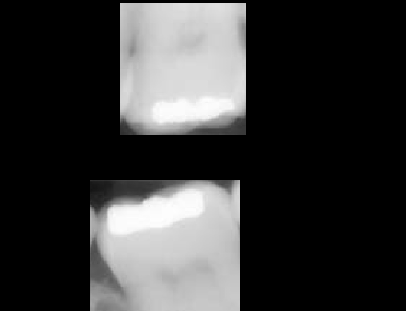

In [96]:
masked_or = cv.bitwise_or(teeth, teeth, mask=mask)
print('OR: ')
cv2_imshow(cv.resize(masked_or, (0,0), fx=0.3, fy=0.3 ))

NOT: 


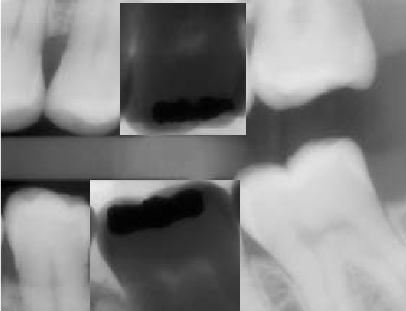

In [97]:
masked_not = cv.bitwise_not(teeth, teeth, mask=mask)
print('NOT: ')
cv2_imshow(cv.resize(masked_not, (0,0), fx=0.3, fy=0.3 ))

XOR: 


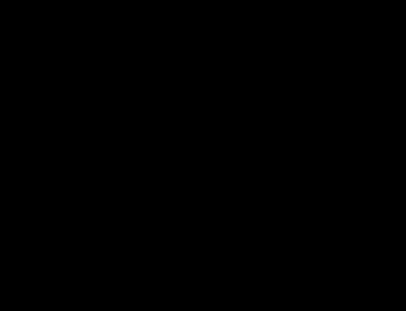

In [98]:
masked_xor = cv.bitwise_xor(teeth, teeth, mask=mask)
print('XOR: ')
cv2_imshow(cv.resize(masked_xor, (0,0), fx=0.3, fy=0.3 ))

NAND: 


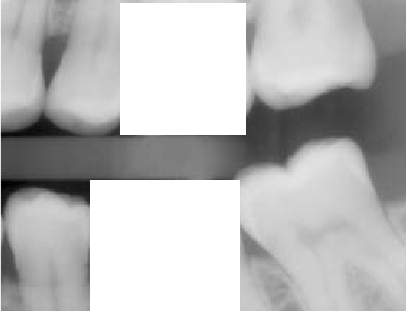

In [99]:
masked_nand = masked_not + masked
print('NAND: ')
cv2_imshow(cv.resize(masked_nand, (0,0), fx=0.3, fy=0.3 ))